## Bibliotecas necessárias

In [27]:
# Importação de Bibliotecas Necessárias
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import soundata
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Extração de features e download dos sons

In [36]:
# Inicializar e baixar o conjunto de dados UrbanSound8K
dataset = soundata.initialize('urbansound8k')
#dataset.download()  # Baixar o dataset
#dataset.validate()  # Validar a presença de todos os arquivos esperados

# Função para extrair características (exemplo: MFCC)
def extract_features(audio_data, sample_rate):
    # Extração de MFCCs
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
    mfccs_mean = np.mean(mfccs, axis=1)

    # Extração de Chroma
    chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
    chroma_mean = np.mean(chroma, axis=1)

    # Extração de Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate)
    spectral_contrast_mean = np.mean(spectral_contrast, axis=1)

    # Extração de Zero Crossing Rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(audio_data)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)

    # Combinando todas as características
    combined_features = np.hstack((mfccs_mean, chroma_mean, spectral_contrast_mean, zero_crossing_rate_mean))
    return combined_features

# Lista para armazenar as características e rótulos
features = []
labels = []

# Iterar sobre os exemplos do conjunto de dados
for clip in dataset.clip_ids:
    audio_clip = dataset.clip(clip)
    
    # Carregar os dados de áudio e a taxa de amostragem
    audio_data, sample_rate = audio_clip.audio

    # Extrair características
    data = extract_features(audio_data, sample_rate)

    # Adicionar características e rótulo à lista
    features.append(data)
    tags=audio_clip.tags
    labels.append(tags.labels[np.argmax(tags.confidence)])

df_features = pd.DataFrame(features)


# Converter as listas em arrays NumPy
features = np.array(features)
labels = np.array(labels)

print(features)
# Normalização dos dados
scaler = StandardScaler()
features = scaler.fit_transform(features)

print(df_features.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8732 non-null   float64
 1   1       8732 non-null   float64
 2   2       8732 non-null   float64
 3   3       8732 non-null   float64
 4   4       8732 non-null   float64
 5   5       8732 non-null   float64
 6   6       8732 non-null   float64
 7   7       8732 non-null   float64
 8   8       8732 non-null   float64
 9   9       8732 non-null   float64
 10  10      8732 non-null   float64
 11  11      8732 non-null   float64
 12  12      8732 non-null   float64
 13  13      8732 non-null   float64
 14  14      8732 non-null   float64
 15  15      8732 non-null   float64
 16  16      8732 non-null   float64
 17  17      8732 non-null   float64
 18  18      8732 non-null   float64
 19  19      8732 non-null   float64
 20  20      8732 non-null   float64
 21  21      8732 non-null   float64
 22  

## Unir features com labels e criar dataset

In [7]:
df_features = pd.DataFrame(features)

# Adicionar os rótulos ao DataFrame
df_features['label'] = labels

unique_labels = df_features['label'].unique()
print("Etiquetas únicas no conjunto de dados:", unique_labels)

Etiquetas únicas no conjunto de dados: ['children_playing' 'gun_shot' 'air_conditioner' 'jackhammer' 'drilling'
 'engine_idling' 'dog_bark' 'siren' 'street_music' 'car_horn']


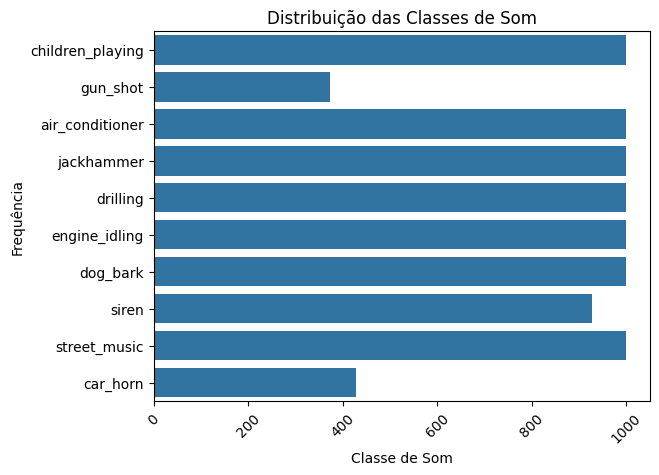

In [28]:
# Supondo que 'labels' seja a sua lista ou array de rótulos das classes
sns.countplot(labels)
plt.title('Distribuição das Classes de Som')
plt.xlabel('Classe de Som')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Supondo que 'durations' seja a sua lista de durações dos trechos de áudio

plt.hist(durations, bins=30)
plt.title('Distribuição da Duração dos Trechos de Áudio')
plt.xlabel('Duração (s)')
plt.ylabel('Frequência')
plt.show()

NameError: name 'durations' is not defined

/tmp/ipykernel_2127/1295844884.py:20: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max),


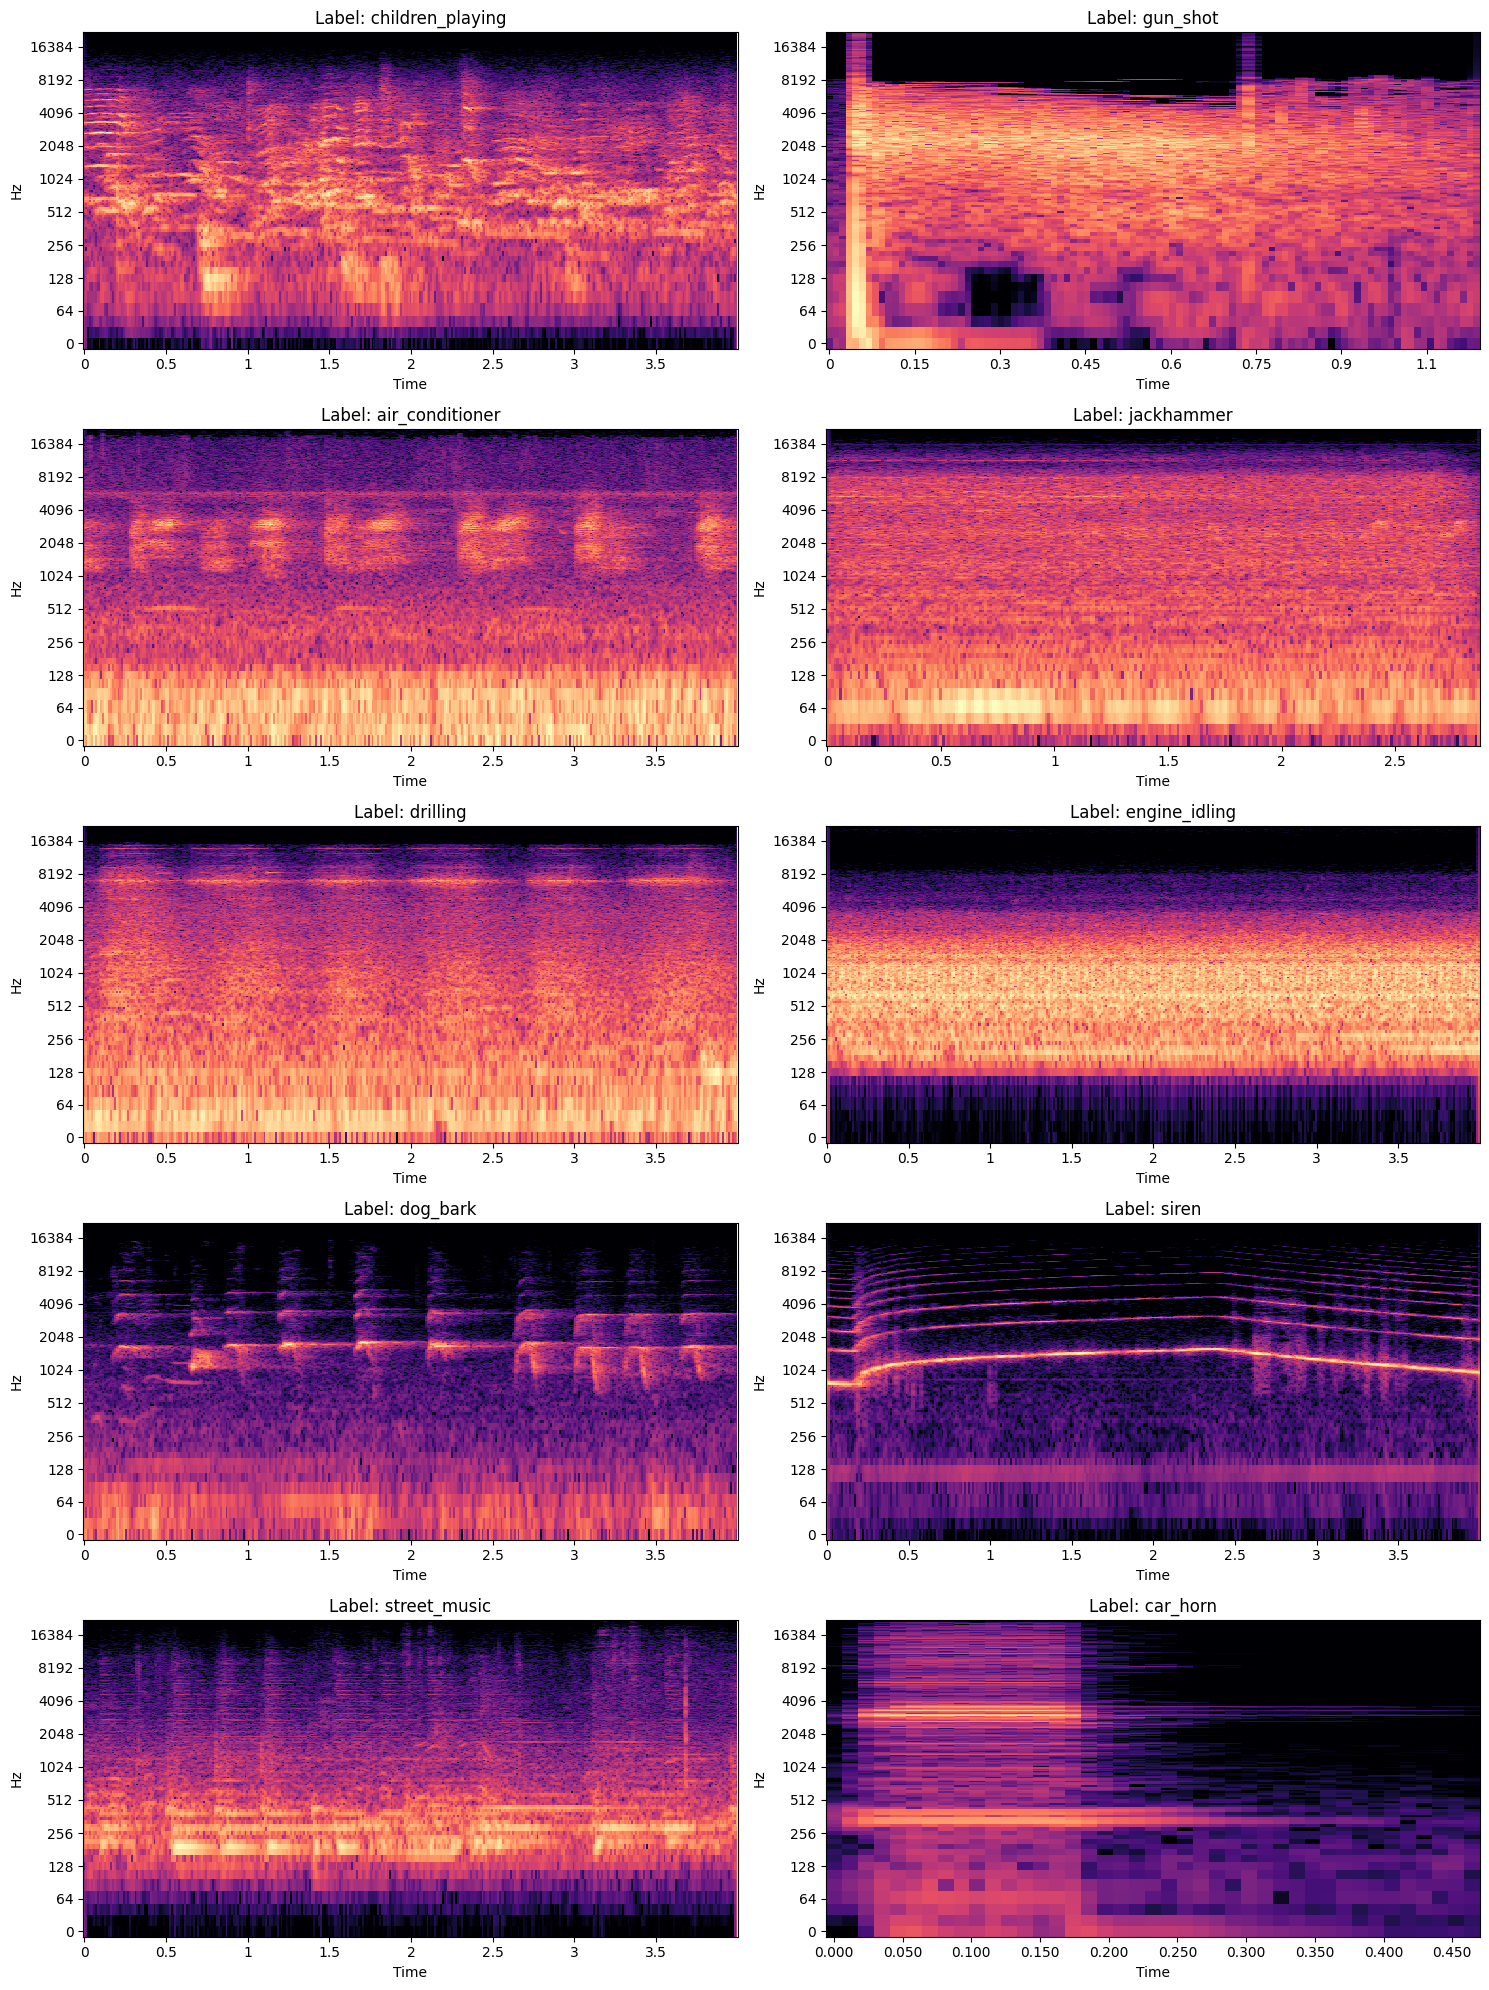

In [34]:
# Preparando o layout para os subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))  #tamanho dos subplots
axes = axes.flatten()  # array unidimensional

processed_labels = set()
label_count = 0

for clip in dataset.clip_ids:
    audio_clip = dataset.clip(clip)
    
    audio_data, sample_rate = audio_clip.audio
    tags = audio_clip.tags
    label = tags.labels[np.argmax(tags.confidence)]
    
    if label not in processed_labels:
        processed_labels.add(label)
        
        # Meter grafico no subplot correspondente
        librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max), 
                                 sr=sample_rate, 
                                 x_axis='time', 
                                 y_axis='log', 
                                 ax=axes[label_count])
        axes[label_count].set_title(f'Label: {label}') 
        label_count += 1

        if label_count >= 10:  # Se já tiver os 10 graficos
            break

plt.tight_layout()
plt.show()


### PARA TIRAR. EXEMPLO DE AUDIO E LABEL

In [8]:
from IPython.display import Audio
tags = audio_clip.tags

# Se você quiser todas as etiquetas
all_labels = tags.labels

# Se você quiser a etiqueta com maior confiança
max_confidence_index = np.argmax(tags.confidence)
label_with_highest_confidence = tags.labels[max_confidence_index]

print("Todas as etiquetas:", all_labels)
print("Etiqueta com maior confiança:", label_with_highest_confidence)
Audio(data=audio_data, rate=sample_rate)


Todas as etiquetas: ['children_playing']
Etiqueta com maior confiança: children_playing


## Primeiro Modelo Convulsional Neural Network

### Train test split

In [9]:
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split

# Codificação dos rótulos
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

# Conversão dos rótulos para formato categórico
y_train_categorical = to_categorical(y_train, num_classes=len(unique_labels))
y_test_categorical = to_categorical(y_test, num_classes=len(unique_labels))

### Definir arquitetura 

In [10]:
# Definição da arquitetura do modelo CNN
from tensorflow.keras.layers import Conv1D, MaxPooling1D

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(features.shape[1], 1)))  # Usando entrada 1D
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(unique_labels), activation='softmax'))  # Número de classes

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

2023-11-24 11:43:53.975266: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-24 11:43:53.981961: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 29, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 27, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 128)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 1664)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### Testar modelo

In [11]:
# Treino do modelo
history = model.fit(X_train, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_test, y_test_categorical))

# Avaliação do modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)
print("Acurácia no conjunto de teste:", test_accuracy)

Epoch 1/10
219/219 [==============================] - 3s 9ms/step - loss: 1.5217 - accuracy: 0.4710 - val_loss: 0.9972 - val_accuracy: 0.6989
Epoch 2/10
219/219 [==============================] - 1s 6ms/step - loss: 0.9438 - accuracy: 0.6892 - val_loss: 0.6673 - val_accuracy: 0.7773
Epoch 3/10
219/219 [==============================] - 1s 7ms/step - loss: 0.7008 - accuracy: 0.7694 - val_loss: 0.5402 - val_accuracy: 0.8254
Epoch 4/10
219/219 [==============================] - 1s 6ms/step - loss: 0.5619 - accuracy: 0.8166 - val_loss: 0.4198 - val_accuracy: 0.8678
Epoch 5/10
219/219 [==============================] - 1s 5ms/step - loss: 0.4556 - accuracy: 0.8495 - val_loss: 0.3757 - val_accuracy: 0.8832
Epoch 6/10
219/219 [==============================] - 1s 5ms/step - loss: 0.3774 - accuracy: 0.8754 - val_loss: 0.3552 - val_accuracy: 0.8838
Epoch 7/10
219/219 [==============================] - 1s 5ms/step - loss: 0.3247 - accuracy: 0.8879 - val_loss: 0.3444 - val_accuracy: 0.8947
Epoch 

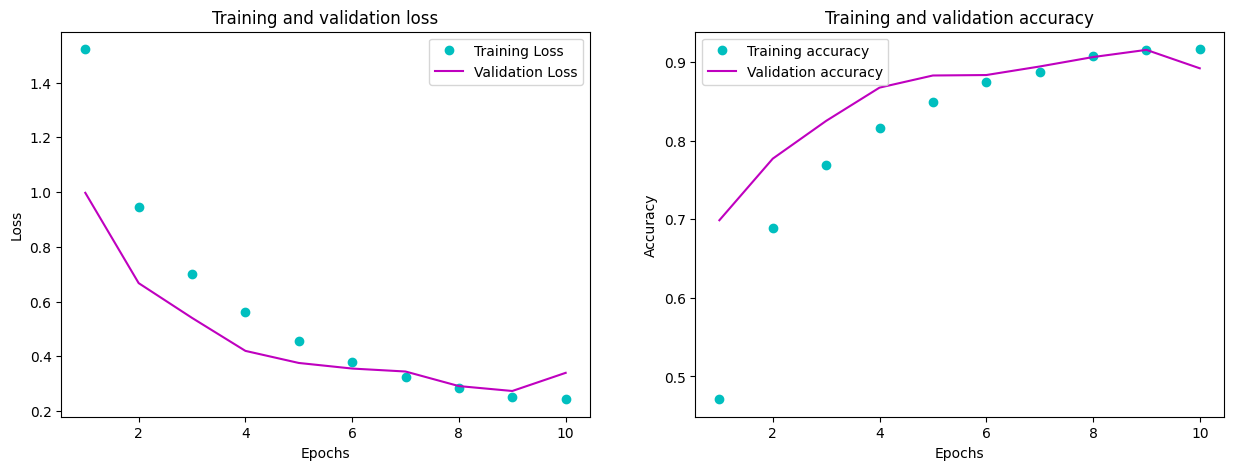

In [22]:
#Adapted from Deep Learning with Python by Francois Chollet, 2018
history_dict = history.history

loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs = range(1,11)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'co',label='Training Loss')
ax1.plot(epochs,val_loss_values,'m', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'co', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'m',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [23]:
TrainLoss, Trainacc = model.evaluate(X_train,y_train_categorical)
TestLoss, Testacc = model.evaluate(X_test, y_test_categorical)
y_pred=model.predict(X_test)
print('Confusion_matrix: ', tf.math.confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))

55/55 [==============================] - 0s 1ms/step
Confusion_matrix:  tf.Tensor(
[[161   0   7   1   1   0   2   0   0   3]
 [  1  70   1   0   0   0   0   1   1  18]
 [  0   0 195   4   1   0   1   0   0   8]
 [  3   1  29 161   6   1   0   0   2   8]
 [  0   0   2   1 168   0   1   4   0   8]
 [  2   1   3   1   4 197   0   0   2   3]
 [  1   0   5   4   0   0  64   0   0   0]
 [  0   0   0   0   3   0   0 185   0   2]
 [  0   0   8   3   0   2   0   0 170   4]
 [  1   0  16   3   0   1   0   2   1 188]], shape=(10, 10), dtype=int32)


## Segundo modelo: Sara Sampaio

In [ ]:
''''
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(features.shape[0], features.shape[1], 1))) # Ajustar conforme a forma dos seus dados
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(len(unique_labels), activation='softmax'))  # Número de classes ajustado

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


In [ ]:
'''
# Treino do modelo
history = model.fit(X_train, y_train_categorical, validation_data=(X_test,y_test_categorical), batch_size=32, epochs=10)

# Avaliação do modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)
print("Acurácia no conjunto de teste:", test_accuracy)